<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_53_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 53: Logistic Regression - Surface Plot & Partial Derivatives, Gradient Decent

---



In the previous class, you learnt to differentiate a function to find the slope of a tangent. You also learnt that the slope of a tangent is zero at the points of the maximum and minimum values of a curve as the tangent on those points are parallel to the $x$-axis. In this class, you will learn to create a surface plot which is a kind of three-dimensional plot to visualise the regularised cost function to visually locate the points of its maximum and minimum value.



---

#### Dummy Data

In [ ]:
# Dummy dataset creation using the 'make_blob()' function.
import pandas as pd
from sklearn.datasets import make_blobs

features_array, target_array = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 42, cluster_std = 1.25)

# Object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
print(f"The features array is an {type(features_array)} object.\nThe target array is an {type(target_array)} object.\n")
print(f"The features array has {features_array.shape[0]} rows and {features_array.shape[1]} columns.")
print(f"The target array has {target_array.shape[0]} rows and {len(target_array.shape)} column.")

# Pandas DataFrame creation.
dummy_dict = {'col 1': [features_array[i][0] for i in range(features_array.shape[0])],
             'col 2': [features_array[i][1] for i in range(features_array.shape[0])],
             'target': target_array}

dummy_df = pd.DataFrame.from_dict(dummy_dict)

# The number of occurrences of each label in the 'target' column.
print(f"Target counts:\n{dummy_df['target'].value_counts()}")

The features array is an <class 'numpy.ndarray'> object.
The target array is an <class 'numpy.ndarray'> object.

The features array has 1000 rows and 2 columns.
The target array has 1000 rows and 1 column.
Target counts:
target
0    500
1    500
Name: count, dtype: int64


In [ ]:
dummy_df.shape

(1000, 3)

In [ ]:
type(features_array)

numpy.ndarray

---

#### Activity 1: Surface Plot

Before differentiating the cost function

$$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m} \sum_{j = 1}^n \beta_j^2$$

to get the optimum values of $\beta_0, \beta_1$ and $\beta_2$, let's visualise it for the different values of $\beta_1$ and $\beta_2$ only. In that case, the regularised cost function becomes

$$J(\beta_1, \beta_2) = -\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m}(\beta_1 ^2 + \beta_2 ^2)$$

where

$$p_i = \frac{1}{1 + e^{-(\beta_1 x_{i1} + \beta_2 x_{i2})}}$$

For this, you need to create a surface plot which is a three-dimensional graph because you need three axes:

1. One axis for plotting the $\beta_1$ values

2. Another axis for plotting the $\beta_2$ values

3. One more axis for plotting the $J$ values

To create a three-dimensional plot, you need to

- Import the  `Axes3D`  class from the `mpl_toolkits.mplot3d` module

- Create an array containing the values for $x$-axis. In this case, $\beta_1$ values

- Create an array containing the values for $y$-axis. In this case, $\beta_2$ values

- Create an $N$-dimensional array containing the ordered pairs of $x$-$y$ values i.e. $(x, y)$. In this case, $(\beta_1, \beta_2)$ ordered pairs. You can do this using the `meshgrid(array1, array2)` function of the `numpy` module where the `array1` and `array2` are the arrays whose values will be used to create ordered pairs.

- Finally, you need to use the `plot_surface()` function of the `Axes3D` class of the `mpl_toolkits.mplot3d` module.

In [ ]:
features_array.shape[0]

1000

In [ ]:
features_array[:5]

array([[-1.46458248,  7.60215256],
       [ 6.73700485,  1.28118438],
       [ 3.26953498,  0.17310608],
       [ 5.2934232 ,  1.25604468],
       [ 4.41427894,  5.96455414]])

In [ ]:
target_array

(1000,)

Betas:
 [[-3.         -2.99399399]
 [-2.98798799 -2.98198198]
 [-2.97597598 -2.96996997]
 [-2.96396396 -2.95795796]
 [-2.95195195 -2.94594595]]

Features:
 [[-1.46458248  7.60215256]
 [ 6.73700485  1.28118438]
 [ 3.26953498  0.17310608]
 [ 5.2934232   1.25604468]
 [ 4.41427894  5.96455414]]

Target values:
 [0 1 1 1 1]

Cost function values:
 [10.255157849819954, 10.213713666668422, 10.172272392096126, 10.130834026663145, 10.08939857094577]


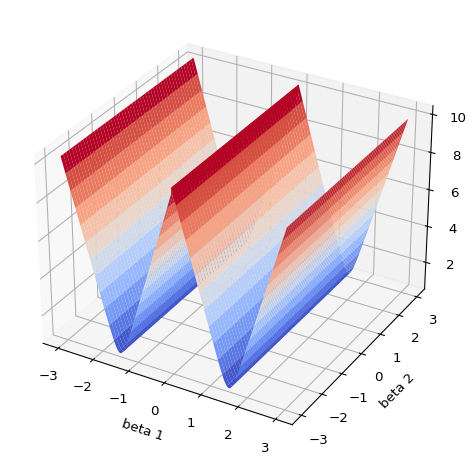

In [ ]:
#  Create a surface plot to visualise the regularised cost function as a function of 'beta1' and 'beta2' only.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # Imports colour map

m = features_array.shape[0] # Number of records

# Arrays containing random 'beta1' and 'beta2' values
beta1 = np.linspace(-3, 3, m)
beta2 = np.linspace(-3, 3, m)

# An array containing 'beta1' and 'beta2' values as a two-dimensional matrix.
beta = np.array([beta1, beta2]).reshape(m, 2)
print("Betas:\n", beta[:5])

# Array of x1, x2 values
print("\nFeatures:\n", features_array[:5])

# Array of y values
print("\nTarget values:\n", target_array[:5])

# Sigmoid function to calculate the probabilities.
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def reg_cost_function(beta):
  cost_func_values = [] # A Python list to store the regularised cost function values obtained for all 1000 'beta1' and 'beta2' values.
  for i in range(m):
    error1 = target_array.reshape(1, m) * np.log(sigmoid(np.matmul(beta[i], np.transpose(features_array)))) # y * log p
    error2 = (1 - target_array.reshape(1, m)) * np.log(1 - sigmoid(np.matmul(beta[i], np.transpose(features_array)))) # (1 - y) * log (1 - p)
    cost = - (1 / m) * np.sum(error1 + error2) + 10 / (2 * m) * np.sum(beta[i] ** 2) # Here lambda = 10 is arbitrarily chosen.
    cost_func_values.append(cost)
  return cost_func_values

# Returns 'beta1' and 'beta2' values as ordered pairs to create a surface plot for the regularised cost function.
meshed_beta1, meshed_beta2 = np.meshgrid(beta1, beta2)

# Cost function values for all the set of 'beta1' and 'beta2' values.
cost_func_values = reg_cost_function(beta)
print("\nCost function values:\n", cost_func_values[:5])

# Creating a surface plot.
fig = plt.figure(figsize = (10, 6), dpi = 96)
#ax = fig.gca(projection = '3d') # previous versions
ax = fig.add_subplot(projection='3d')
ax.plot_surface(meshed_beta1, meshed_beta2, np.array(cost_func_values).reshape(1, m), cmap = cm.coolwarm)
plt.xlabel("beta 1")
plt.ylabel("beta 2")
plt.show()

As you can see, we have created a three-dimensional plot (surface plot to be specific) for the regularised cost function for 1000 different set of $\beta_1$ and $\beta_2$ values. You can see that the cost function has its lowest values at points between $\beta_1 = -2$ and $\beta_1 = -1$, $\beta_1 = 1$ and $\beta_1 = 2$ .

**Note:** The real cost function for the dummy dataset is dependent on all the three betas. So, the above three-dimensional plot does not represent the real cost function. In order to visualise the cost function, we discarded $\beta_0$ because it is physically impossible to create a four-dimensional plot. You could have also discarded either $\beta_1$ or $\beta_2$ instead of $\beta_0$ to create a three-dimensional plot.

In the `for` loop in the above code i.e.:

```
error1 = target_array.reshape(1, m) * np.log(sigmoid(np.matmul(beta[i], np.transpose(features_array))))
error2 = (1 - target_array.reshape(1, m)) * np.log(1 - sigmoid(np.matmul(beta[i], np.transpose(features_array))))
cost = - (1 / m) * np.sum(error1 + error2) + 10 / (2 * m) * np.sum(beta[i] ** 2)
cost_func_values.append(cost)
```

- The `np.matmul(beta[i], np.transpose(features_array))` multiplies the $B = \begin{bmatrix} \beta_1 & \beta_2\end{bmatrix}$ matrix with the $X = \begin{bmatrix}x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\ \vdots & \vdots \\ x_{10001} & x_{10002} \end{bmatrix}$ matrix i.e. $BX^T$

- The `sigmoid(np.matmul(beta[i], np.transpose(features_array)))` part calculates the probabilities i.e. $p = \frac{1}{1 + e^{-BX^T}}$for one set of $\beta$ values

- The `error1` variable stores the $y_i \log p_i$ part of the cost function for one set of $\beta$ values

- The `error2` variable stores the $(1 - y_i) \log (1 - p_i)$ part of the cost function one set of $\beta$ values

- The `cost` variable stores the regularised cost function $-\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m}(\beta_1 ^2 + \beta_2 ^2)$ value one set of $\beta$ values

- The `cost_func_values` list stores the regularised cost function values for all the 1000 set of $\beta$ values.

The `np.meshgrid(beta1, beta2)` function creates ordered pairs for the `beta1` and `beta2` array values and stores them in the `meshed_beta1` and `meshed_beta2` variables.

The `plt.figure(figsize = (10, 6), dpi = 96)` function creates a `matplotlib` figure object and stores it in the `fig` variable.

The `gca(projection = '3d')` function is called on the figure object created above with `projection` as a parameter and its value equal to `'3d'` which asks the `matplotlib.pyplot` object to **get** the **current axis** (full form of GCA). And the parameter, `projection = '3d'`, denotes to get three axes i.e. $x, y, z$ to create a three-dimensional plot. This 3D axis is stored in the `ax` variable.

On the 3D axis stored in the `ax` variable, the `plot_surface()` function is called to create a surface plot between $\beta_1, \beta_2$ and $J$ for which `meshed_beta1, meshed_beta2, np.array(cost_func_values).reshape(1, m)` inputs are passed to the function. The additional parameter `cmap` (short-form for **colour-map**) defines the colour of the surface plot for which the `cm.coolwarm` value is passed. The `cost_func_values` stores a Python list that is converted to a `numpy` array and having 1 row and 1000 columns.

In [ ]:
meshed_beta1[0]

---

In [ ]:
x = np.array([1, 2, 3])
y = np.array([4, 5])

In [ ]:
xx, yy = np.meshgrid(x, y)
print("xx:\n", xx)
print("yy:\n", yy)

xx:
 [[1 2 3]
 [1 2 3]]
yy:
 [[4 4 4]
 [5 5 5]]


**Explanation:**

- xx contains the x coordinates repeated along rows.
- yy contains the y coordinates repeated along columns.

Together, they represent every combination of x and y values:
`
(1,4), (2,4), (3,4)
(1,5), (2,5), (3,5)`

**Usage in Surface Plots:**

In surface plots, you need a grid of x and y coordinates (beta1 and beta2), and then you compute a corresponding z-value (like a cost function). np.meshgrid provides the x and y coordinates over which you evaluate the z-values (like cost). These grids are then used to plot surfaces, contours, or evaluate functions over a region of the x-y plane.


`meshed_beta1, meshed_beta2 = np.meshgrid(beta1, beta2)`

- meshed_beta1 is a 2D array with all combinations of beta1.
- meshed_beta2 is a 2D array with all combinations of beta2.

These grids are then used to evaluate the cost function for each combination of beta1 and beta2.

#### Activity 2: Rules of Derivatives
Continuing with the motivation to differentiate the regularised cost function

$$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \} + \frac{\lambda}{2m} \sum_{j = 1}^n \beta_j^2$$

to obtain the optimum beta values, let's quickly go through the rules of derivatives.

In the last class, you used the following approach to differentiate $y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$ wrt $x$

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
\end{equation}

This is called the first-principle approach. It takes a lot of time to calculate derivatives. Hence, to quicken up the calculation of derivatives, you can use a set of rules of derivatives that are derived using the first principle approach. Eg.

To differentiate $y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$ wrt $x$, you can use the following rule

\begin{align}
y &= kx^n \\
\frac{dy}{dx} &= k \frac{d(x^n)}{dx}  \\
\Rightarrow \frac{dy}{dx} &= kn x^{n - 1}
\end{align}

which says that the differentiation of a function $y = kx^n$ is $kn$ times $x$ raised to power $n - 1$ where

- $k$ is some arbitrary constant and $k \neq 0$

- $n$ is some real number and $n \neq 0$

If $n = 0$, the function becomes $y = k$ and its differentiation wrt any variable $\frac{dy}{dx} = 0$

So, here are the two rules of derivatives that we just discovered.

**Rule 1:** For $y = kx^n$
\begin{equation}
\frac{dy}{dx} = kn x^{n - 1}
\end{equation}

**Rule 2:** For $y = k$
\begin{equation}
\frac{dy}{dx} = 0
\end{equation}

Let's apply the first rule to differentiate the function $y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$ wrt $x$

\begin{align}
\frac{dy}{dx} &= \frac{1}{5} \times \frac{d(x^5)}{dx} - \frac{26}{3} \times \frac{d(x^3)}{dx} + 25 \times \frac{d(x)}{dx} \\
&= \frac{1}{5}\times 5 x^{5 - 1} - \frac{26}{3} \times 3 x^{3 - 1} + 25 x^{1 - 1}\\
&= x^4 - 26x^2 + 25
\end{align}

Since we need to differentiate log that is present in the cost function, let's now learn the rule to differentiate a logarithmic function.

**Rule 3:** For $y = \log x$
\begin{equation}
\frac{dy}{dx} = \frac{1}{x}
\end{equation}

If you extend the log function further to $y = \log (kx^n)$, then its derivative wrt $x$ is

\begin{equation}
\frac{dy}{dx} = \frac{1}{kx^n} \times \frac{d(kx^n)}{dx} \\
\end{equation}

$\qquad \qquad \qquad \qquad$ [Whatever written in the log goes to the denominator $\times$ The derivative of whatever written in the log]

\begin{align}
\frac{dy}{dx} &= \frac{1}{kx^n} \times kn x^{n - 1} \\
\Rightarrow \frac{dy}{dx} &= \frac{n}{x}
\end{align}

**Rule 4:** For $y =  e^x$
\begin{equation}
\frac{dy}{dx} = e^{x}
\end{equation}

If you extend the exponential function further to $y = e^{kx^n}$, then its derivative wrt $x$ is

\begin{equation}
\frac{dy}{dx} = e^{kx^n} \times \frac{d(kx^n)}{dx} \\
\end{equation}

$\qquad \qquad \qquad \qquad$ [$e^{kx^n}$ remains as it is $\times$ The derivative of whatever written in the power of $e$]

\begin{align}
\Rightarrow \frac{dy}{dx} &= e^{kx^n} \times kn x^{n - 1}
\end{align}

Using these four rules, finally, we can now differentiate the regularised cost function.



---

#### Activity 3: Derivative of Regularised Cost Function

Let's first differentiate the cost function wrt to $\beta_0$ and simultaneously, we will treat $\beta_1, \beta_2, \beta_3, \dots, \beta_n$ as constants i.e as $y = k$ whose derivative will be 0. This is called partial derivatives.

**Note:** At this point, you don't need to know the meaning of partial derivatives. Just treat one of the betas as an independent variable at a time and all the other betas as constants.

In the case of partial derivatives, the $\partial$ symbol is used instead of the $d$ symbol. It is commonly pronounced as either **del** or **doh**.

\begin{align}
J &= - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i)) + \frac{\lambda}{2m}(\beta_1^2 + \beta_2^2 + \dots + \beta_n^2)\\
\frac{\partial J}{\partial \beta_0} &=  - \frac{1}{m} \sum_{i = 1} ^{m} \left( y_i \times \frac{1}{p_i} \times \frac{\partial p_i}{\partial \beta_0} + (1 - y_i) \times \frac{-1}{1 - p_i} \times \frac{\partial p_i}{\partial \beta_0} \right) + \frac{\lambda}{2m}\times 0
\end{align}

We know that

\begin{align}
p_i &= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} \\
\therefore \frac{\partial p_i}{\partial \beta_0} &= - \left( \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} \right)^2 (0 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})(-1 + 0) \\
&= \frac{e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}{(1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})^2} \\
\end{align}

On adding $-1$ and $1$ to the above equation, we get

\begin{align}
\therefore \frac{\partial p_i}{\partial \beta_0} &= \frac{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)} - 1}{(1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})^2} \\
&= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} - \frac{1}{(1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})^2} \\
&= p_i - p_i^2 \\
&= p_i(1 - p_i)
\end{align}

On substituting $\frac{\partial p_i}{\partial \beta_0}$ in the derivative of the cost function wrt $\beta_0$, we get

\begin{align}
\frac{\partial J}{\partial \beta_0} &=  - \frac{1}{m} \sum_{i = 1} ^{m} \left( y_i \times \frac{1}{p_i} \times p_i(1 - p_i) + (1 - y_i) \times \frac{-1}{1 - p_i} \times p_i(1 - p_i) \right) \\
&=  - \frac{1}{m} \sum_{i = 1} ^{m} \left( y_i (1 - p_i) - (1 - y_i) p_i\right) \\
&=  - \frac{1}{m} \sum_{i = 1} ^{m} (y_i  - y_i p_i - p_i + y_i p_i) \\
\Rightarrow \frac{\partial J}{\partial \beta_0} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)
\end{align}

Similarly, if you differentiate $J$ wrt to $\beta_1$, you will get

\begin{equation}
\frac{\partial J}{\partial \beta_1} =  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1 \\
\end{equation}

In general, for $\beta_j = \beta_1$ to $\beta_n$, you will get

\begin{equation}
\frac{\partial J}{\partial \beta_j} =  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_j + \frac{\lambda}{m} \beta_j \\
\end{equation}

 In the next activity, you will learn to implement these derivatives in Python to calculate the optimum values of $\beta_0, \beta_1$ and $\beta_2$

f
′
 (x)=
(h(x))
2

g
′
 (x)h(x)−g(x)h
′
 (x)
​


---

# Gradient Descent


---


In the previous activity, you learnt to compute the partial derivatives of the regularised cost function wrt all the betas i.e. $\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}, \frac{\partial J}{\partial \beta_2}, \dots, \frac{\partial J}{\partial \beta_n}$ and to create a surface plot for a function dependent on two independent variables; in this case, a regularised cost function dependent on $\beta_1$ and $\beta_2$.

In this activity, you will learn to use these partial derivatives in Python to find the optimum beta values by building a gradient descent algorithm in Python.



---

#### Dummy Dataset



In [ ]:
# Dummy dataset creation using the 'make_blob()' function.
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

features_array, target_array = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 42, cluster_std = 1.25)

# Object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
print(f"The features array is an {type(features_array)} object.\nThe target array is an {type(target_array)} object.\n")
print(f"The features array has {features_array.shape[0]} rows and {features_array.shape[1]} columns.")
print(f"The target array has {target_array.shape[0]} rows and {len(target_array.shape)} column.")

# Pandas DataFrame creation.
dummy_dict = {'col 1': [features_array[i][0] for i in range(features_array.shape[0])],
             'col 2': [features_array[i][1] for i in range(features_array.shape[0])],
             'target': target_array}

dummy_df = pd.DataFrame.from_dict(dummy_dict)

# The number of occurrences of each label in the 'target' column.
print(f"Target counts:\n{dummy_df['target'].value_counts()}")

The features array is an <class 'numpy.ndarray'> object.
The target array is an <class 'numpy.ndarray'> object.

The features array has 1000 rows and 2 columns.
The target array has 1000 rows and 1 column.
Target counts:
target
0    500
1    500
Name: count, dtype: int64


---

#### Calculating Coefficients Using `sklearn` Module

Beta 0 = 6.3267
Beta 1 = 1.4679
Beta 2 = -1.3607


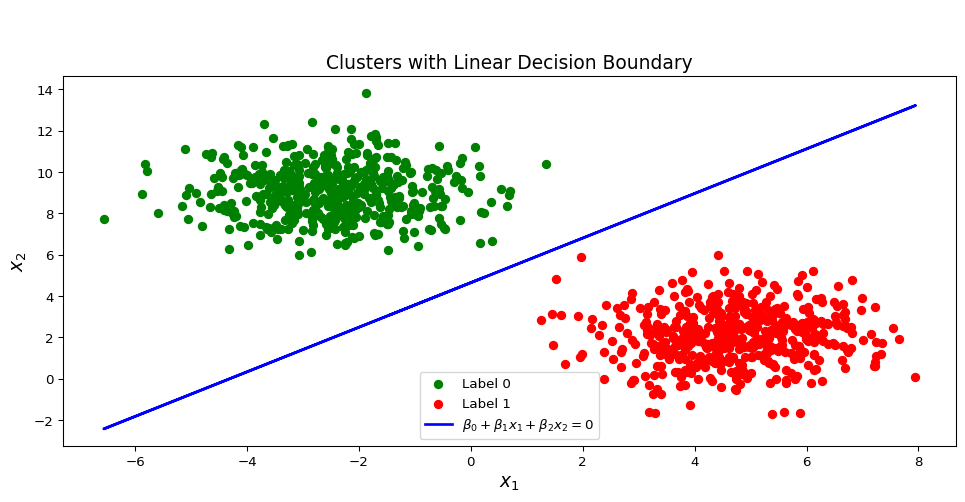

In [ ]:
# Coefficients Estimation by building a logistic regression model using the 'sklearn' module.
from sklearn.linear_model import LogisticRegression

X = dummy_df[dummy_df.columns[:-1]] # Features
y = dummy_df['target'] # Target

def decision_boundary_coeffs(X, y):
  logistic_reg = LogisticRegression(random_state=0).fit(X, y)
  coef_list = list(logistic_reg.intercept_) + list(logistic_reg.coef_[0])
  return coef_list

coef_list = decision_boundary_coeffs(X, y)
for i in range(len(coef_list)):
  print(f"Beta {i} = {coef_list[i]:.4f}")

# Plotting the decision boundary
pred_col2_values = - (coef_list[0] + coef_list[1] * dummy_df['col 1']) / coef_list[2]

plt.figure(figsize = (12, 5), dpi = 96)
plt.title("\n\nClusters with Linear Decision Boundary", fontsize = 14)
plt.scatter(dummy_df.loc[dummy_df['target'] == 0, 'col 1'], dummy_df.loc[dummy_df['target'] == 0, 'col 2'], label = 'Label 0', color = 'g')
plt.scatter(dummy_df.loc[dummy_df['target'] == 1, 'col 1'], dummy_df.loc[dummy_df['target'] == 1, 'col 2'], label = 'Label 1', color = 'r')
plt.plot(dummy_df['col 1'], pred_col2_values, color = 'b', linewidth = 2, label = r"$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$")
plt.xlabel(r"$x_1$", fontsize = 14)
plt.ylabel(r"$x_2$", fontsize = 14)
plt.legend()
plt.show()

In [ ]:
# First three values of 'target_array'.
print(target_array[:3])

# Last three values of 'target_array'.
print(target_array[-3:])

[0 1 1]
[1 1 0]


---

#### Derivative of Regularised Cost Function

The regularised cost function.

\begin{equation}
J = - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i)) + \frac{\lambda}{2m}(\beta_1^2 + \beta_2^2 + \dots + \beta_n^2)\\
\end{equation}

The partial derivatives

\begin{align}
\frac{\partial J}{\partial \beta_0} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i) \\
\frac{\partial J}{\partial \beta_1} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1 \\
\end{align}

In general, for $\beta_j = \beta_1$ to $\beta_n$
\begin{equation}
\frac{\partial J}{\partial \beta_j} =  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_j + \frac{\lambda}{m} \beta_j \\
\end{equation}

---

#### Activity 1: The Gradient Descent Algorithm

**What is a gradient?**

A gradient is just another word for the slope of a straight line. In short,

$$\text{gradient} = \frac{dy}{dx} = \text{slope of a straight line}$$

It is just another name for derivatives.


**What is gradient descent?**

The gradient descent algorithm is a technique used to find the point of the minimum value of a cost function to further compute the optimum values of betas. The term "gradient descent" literally means that you are going in the direction where the slope of a tangent of a cost function is descending or decreasing.

**How the gradient descent algorithm locates the point of minimum value of a function?**

The gradient descent algorithm,

- Calculates a gradient or slope of a tangent to the cost function curve at some initial arbitrary points on the curve.

  Let's assume that the graph between the cost function and $\beta_0$ only follows the curve shown below.

  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-01.jpg' width = 600></center>

  The tangent and its slope at some arbitrary point $\beta_0$ is also shown in the curve

- Refactors the gradients obtained by multiplying them with some arbitrary value called learning rate denoted by $\alpha$ and subtracts the refactored value from the initial points on the curve
  
  To get the new value of $\beta_0$, the previous slope i.e. $\frac{\partial J}{\partial \beta_0}$ is multiplied with $\alpha$ and the initial $\beta_0$ is replaced by $\beta_0 - \alpha \frac{\partial J}{\partial \beta_0}$

  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-02.jpg' width = 600></center>

  The tangent and its slope at the new $\beta_0$ point is also shown in the curve. As you might have noticed, $\alpha$ is used to get a new value of $\beta_0$. Suppose the initial value of $\beta_0$ is $10$, $\frac{\partial J}{\partial \beta_0} = 4$ and $\alpha = 0.1$. So new value of $\beta_0$ becomes $\beta_0 = 10 - 0.1 \times 4 = 9.6$. Then let $\frac{\partial J}{\partial \beta_0} = 2.5$, so $\beta_0 = 9.6 - 0.1 \times 2.5 = 9.35$ and so on until $\frac{\partial J}{\partial \beta_0} = 0$

- Repeats the above steps until the lowest point on the curve is obtained
  
  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-03.jpg' width = 600></center>

  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-04.jpg' width = 600></center>

  <center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/grad-descent-05.jpg' width = 600></center>

  As you can see, the tangent gradually shifted to the point of minimum value of the regularised cost function wrt $\beta_0$ only. Similarly, you can visualise the above graph for $J$ as a function of $\beta_1$ and $\beta_2$ individually. In all the cases, the tangent will converge to the point of minimum value of the regularised cost function.

To implement the gradient descent algorithm, you need to go through the following steps:

1. Select some random values of betas, say $\beta_0 = 0, \beta_1 = 0$ and $\beta_2 = 0$

2. Compute the gradient or slope of a tangent on those points i.e. $\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}$ and $\frac{\partial J}{\partial \beta_2}$ at the points $\beta_0 = 0, \beta_1 = 0$ and $\beta_2 = 0$

3. Multiply the values obtained in the second step with $\alpha$ i.e. $\alpha \frac{\partial J}{\partial \beta_0}, \alpha \frac{\partial J}{\partial \beta_1}$ and $\alpha \frac{\partial J}{\partial \beta_2}$

4. Subtract the values obtained in the third step with the initial values of betas i.e. $\beta_0 - \alpha \frac{\partial J}{\partial \beta_0}, \beta_1 - \alpha \frac{\partial J}{\partial \beta_1}$ and $\beta_2 - \alpha \frac{\partial J}{\partial \beta_2}$

5. Replace the initial values of betas with the ones obtained in the fourth step i.e. $\beta_0 = \beta_0 - \alpha \frac{\partial J}{\partial \beta_0}, \beta_1 = \beta_1 - \alpha \frac{\partial J}{\partial \beta_1}$ and $\beta_2 = \beta_2 - \alpha \frac{\partial J}{\partial \beta_2}$

6. Repeat the above steps until the $\beta_0, \beta_1$ and $\beta_2$ values are obtained such that $J(\beta_0, \beta_1, \beta_2)$ is minimum.

Without further ado, let's learn the gradient descent algorithm in action.


---

#### Activity 2: Pre-requisites

We need to create a regularised cost function in Python for the dummy dataset that has two columns. Hence, in this case, the regularised cost function becomes

\begin{equation}
J = - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i)) + \frac{\lambda}{2m}(\beta_1^2 + \beta_2^2)
\end{equation}

And their partial derivatives wrt $\beta_0, \beta_1$ and $\beta_2$ are given by

\begin{align}
\frac{\partial J}{\partial \beta_0} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i) \\
\frac{\partial J}{\partial \beta_1} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1 \\
\frac{\partial J}{\partial \beta_2} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_2 + \frac{\lambda}{m} \beta_2 \\
\end{align}

But before that, you need the following:

1. An array containing features (independent variables) which you already have. It is stored in the `features_array` variable. You need to add another column to this array having all the values as 1. For this, you can use the `append()` function of the `numpy` module. Its **syntax** is

   `np.append(array1, array2, axis)`

   where

   - `array1` is the array in which you want to add the values of `array2`
   
   - `axis = 0` denotes that you want to add values row-wise or horizontally
   
   - `axis = 1` denotes that you want to add values column-wise or vertically.


2. An array containing the target (dependent variable) which also we already have. It is stored in the `target_array` variable.

3. An array containing some random initial values of betas.

4. A sigmoid function in Python.




In [ ]:
#  Go through all the above preparation steps.

# Import the numpy module.
import numpy as np

# Create a new features array by adding a column (containing all 1s) to the original features array.
X = np.append(np.ones((features_array.shape[0], 1)), features_array, axis = 1)
y = target_array

# Print the feature array and target array.
print(f"Features array:\n{X[:10]}\n\nTarget array:\n{y[:10]}")

# Get the number of records and features.
m, n = X.shape[0], X.shape[1] # 'm' is the total number of records and 'n' is the total number of features.

# Create the initial coefficients array.
initial_beta = np.zeros(shape = (1, n)) # Initial beta_0 = 0, beta_1 = 0 and beta_2 = 0
print("\nInitial beta:\n", initial_beta)

# Create the sigmoid function.
def sigmoid(h):
  return 1/(1 + np.exp(-h))

---

#### Activity 3: Regularised Cost Function in Python

Let's create the function in Python that will return the gradient (or slope of a tangent to the regularised cost function curve) for a set of values of $\beta_0, \beta_1$ and $\beta_2$ and the value of the regularised cost function for these values of betas.

1. Let's name it `reg_cost_function()` and it takes the following four inputs:
  * Coefficients $\beta$
  * Features array
  * Target array
  * Regularisation rate $\lambda$
  
2. Inside the function, first, determine the total number of records in the feature array and store it in a variable called `m`.

3. Calculate the probabilities for hypothesis which is a linear equation $\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}$ and store it in a variable called `probs`.

4. Calculate the error using the log likelihood function for one record and store it in a variable. Let's name the variable as `error`.
   
   $$\text{error} = y \log p + (1 - y) \space{} \log(1 - p)$$

5. Calculate the value of the regularised cost for a set of $\beta_0, \beta_1, \beta_2$ values and store it in a variable. Let's name the variable as `cost`.

   $$J(\beta_0, \beta_1, \beta_2) = -\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m}(\beta_1 ^2 + \beta_2 ^2)$$

   where

   $$p_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2})}}$$

6. Create an array to store the partial derivatives or gradients. Set their initial values to 0. Let's store this array in the `grad` variable.

7. Create a `for` loop to calculate the partial derivatives or gradients of the regularised cost function wrt $\beta_0, \beta_1$ and $\beta_2$ one-by-one and store them in the `grad` variable.


In [ ]:
# Create the regularised cost function.

def reg_cost_function(beta, X, y, reg_rate):
  m = X.shape[0] # Total number of records
  probs = sigmoid(np.matmul(beta, np.transpose(X)))
  error = y.reshape(1, m) * np.log(probs) + (1 - y.reshape(1, m)) * np.log(1 - probs)
  cost = (-1 / m) * np.sum(error) + (reg_rate / (2 * m)) * np.sum(beta[:, 1:] ** 2)
  grad = np.zeros((1, X.shape[1]))
  for i in range(beta.shape[1]):
    grad[0][i] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, i])
  return cost, grad

In the above code:

- The `np.matmul(beta, np.transpose(X))` multiplies the $B = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix}$ matrix with the $X = \begin{bmatrix}1 & x_{11} & x_{12} \\ 1 & x_{21} & x_{22} \\ 1 & x_{31} & x_{32} \\ \vdots & \vdots & \vdots\\ 1 & x_{10001} & x_{10002} \end{bmatrix}$ matrix i.e. $BX^T$

- The `sigmoid(np.matmul(beta, np.transpose(X)))` part calculates the probabilities i.e. $p = \frac{1}{1 + e^{-BX^T}}$

- The `error` variable stores the $y_i \log p_i + (1 - y_i) \log (1 - p_i)$ the log likelihood function.

- The `cost` variable stores the regularised cost function $-\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m}(\beta_1 ^2 + \beta_2 ^2)$ value

- The `for` loop
  ```
  for i in range(beta.shape[1]):
    grad[0][i] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, i])
  ```
  calculates $\frac{\partial J}{\partial \beta_0} = \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i), \frac{\partial J}{\partial \beta_1} = \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1$ and $\frac{\partial J}{\partial \beta_2} = \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_2 + \frac{\lambda}{m} \beta_2$ values

  where

  `grad[0][0] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, 0])` denotes $\frac{\partial J}{\partial \beta_0}$

  `grad[0][1] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, 1])`

  `grad[0][2] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, 2])`


Now, let's calculate the gradients and the value of the regularised cost function for the initial values of betas and $\lambda = 10$.

In [ ]:
# Calculate the gradients and the value of the regularised cost function for the initial values of betas and 𝜆 = 10.
cost, grad = reg_cost_function(initial_beta, X, y, 10)
print("\nThe value of the cost function at initial betas is", cost)
print("\nThe gradients at initial beta (zeros):\n", grad)


The value of the cost function at initial betas is 0.6931471805599454

The gradients at initial beta (zeros):
 [[ 0.         -1.80373398  1.74634403]]


<ipython-input-28-532223890e1a>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0][i] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, i])


----

#### Activity 4: Gradient Descent Function in Python

Now let's create a Python function to implement the gradient descent algorithm in Python that will calculate the partial derivatives of the regularised cost function in Python for a fixed number of iterations and ultimately will find the points i.e. the values $\beta_0, \beta_1$ and $\beta_2$ for which the slope of the tangent to the regularised cost function is 0.

1. Let's name this function as `gradient_descent()` function that will take the following 6 inputs:
   - Features array
   - Target array
   - Coefficients array
   - Learning rate $\alpha$
   - Number of iterations
   - Regularisation rate

   And returns the optimum values of betas and a list of values of the regularised cost function for different values of betas (including the optimum values of betas).

2. Create an empty Python list to store different values of the regularised cost function for different values of betas.

4. Create a `for` loop that runs for the maximum number of iterations specified and at each iteration calculates the

   - value of the regularised cost function for $\beta_0, \beta_1$ and $\beta_2$

   - gradients i.e. $\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}$ and $\frac{\partial J}{\partial \beta_2}$

   - new values of $\beta_0, \beta_1$ and $\beta_2$

In [ ]:
# Create the gradient descent function.
def gradient_descent(X, y, beta, learn_rate, num_iters, reg_rate):
  m = X.shape[0]
  cost_func_values = []
  for i in range(num_iters):
    cost, grad = reg_cost_function(beta, X, y, reg_rate)
    beta[0][0] = beta[0][0] - learn_rate * grad[0][0]
    beta[0][1] = beta[0][1] - learn_rate * (grad[0][1] + reg_rate * beta[0][1] / m)
    beta[0][2] = beta[0][2] - learn_rate * (grad[0][2] + reg_rate * beta[0][2] / m)
    cost_func_values.append(cost)

  return beta, cost_func_values

In the above code:

- The `beta[0][0] = beta[0][0] - learn_rate * grad[0][0]` part calculates

  $$\beta_0 = \beta_0 - \alpha  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)$$

- The `beta[0][1] = beta[0][1] - learn_rate * (grad[0][1] + reg_rate * beta[0][1] / m)` part calculates

  $$\beta_1 = \beta_1 - \alpha  \left( \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1 \right)$$

- The `beta[0][2] = beta[0][2] - learn_rate * (grad[0][2] + reg_rate * beta[0][2] / m)` part calculates

  $$\beta_2 = \beta_2 - \alpha  \left( \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_2 + \frac{\lambda}{m} \beta_2 \right)$$

Let's run the `gradient_descent()` function for 50,000 iterations. Let the learning rate, $\alpha$ be 2 and the regularisation rate, $\lambda$ be 1.  

In [ ]:
# Run the gradient descent function for 50,000 iterations, learning rate = 2 and regularisation rate = 1.
opt_beta, cost_func_values = gradient_descent(X, y, initial_beta, 2, 50000, 1)
print("\nThe beta optimised by gradient descent:\n", opt_beta)
print("\nThe value of the cost function at the optimised beta:", cost_func_values[-1])

<ipython-input-28-532223890e1a>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0][i] = (1 / m) * np.matmul(probs - y.reshape(1, m), X[:, i])



The beta optimised by gradient descent:
 [[ 6.31795666  1.46867581 -1.35944476]]

The value of the cost function at the optimised beta: 0.003137065537016717


As you can observe, we have obtained the optimum values of betas for which the value of the regularised cost function is minimum. These values of betas are almost the same as obtained using the `LogisticRegression` class of the `sklearn` module.

So you have seen how logistic regression (a classification-based machine learning algorithm) tries to calculate a decision boundary to separate the labels from each other behind the scenes. We considered an ideal example of only two features to visualise a linear decision boundary. In real-world cases, we have more than two features. Hence,  the decision boundary is much more complicated and is difficult to visualise in the same way. In fact, even in the case of two features, a decision boundary can be a circle, a parabola, hyperbola or any other non-linear curve.

